In [1]:
'''
Author: Jefferythewind

Description: Transform numerai data to images using the IGTD algo and investigate initial ideas using
convolutional filters.

IGTD: https://www.nature.com/articles/s41598-021-90923-y
Conv Filter: https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381

'''

'\nAuthor: Jefferythewind\n\nDescription: Transform numerai data to images using the IGTD algo and investigate initial ideas using\nconvolutional filters.\n\nIGTD: https://www.nature.com/articles/s41598-021-90923-y\nConv Filter: https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381\n\n'

In [2]:
'''
I do this because I have LightGBM compiled with GPU support installed in this folder
:-)
'''

import sys
sys.path.append("/home/jefferythewind/LightGBM/python-package")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numerapi import NumerAPI
from IGTD_Functions import min_max_transform, table_to_image
from lightgbm import LGBMRegressor
import os



In [4]:
'''
Set up some basic parameters for IGTD
39 is the largest possible square size for V 4.1 data set

feature distance method: Pearson performs slightly better than Euclidean
'''

num_row = 39    # Number of pixel rows in image representation
num_col = 39    # Number of pixel columns in image representation
num = num_row * num_col # Number of features to be included for analysis, which is also the total number of pixels in image representation
save_image_size = 3 # Size of pictures (in inches) saved during the execution of IGTD algorithm.
max_step = 10000    # The maximum number of iterations to run the IGTD algorithm, if it does not converge.
val_step = 300  # The number of iterations for determining algorithm convergence. If the error reduction rate
                # is smaller than a pre-set threshold for val_step itertions, the algorithm converges.

fea_dist_method = 'Pearson'
image_dist_method = 'Euclidean'
error = 'squared'
result_dir = '../Results/nmr41/'

In [5]:
'''
Grab some Numerai Data
'''

napi = NumerAPI()

current_round = napi.get_current_round()

napi.download_dataset("v4.1/train.parquet", "train41.parquet")
napi.download_dataset("v4.1/validation.parquet", "validation41.parquet")
data = pd.concat([
    pd.read_parquet('train41.parquet'),
    pd.read_parquet('validation41.parquet')
])

data = data[ data['data_type'].isin(['train','validation']) ]

2023-01-01 08:41:46,062 INFO numerapi.utils: target file already exists
2023-01-01 08:41:46,063 INFO numerapi.utils: download complete
2023-01-01 08:41:46,628 INFO numerapi.utils: target file already exists
2023-01-01 08:41:46,629 INFO numerapi.utils: download complete


In [6]:
'''
Only take every 4 eras to reduce our workload
'''

eras = data['era'].unique()[::4]
data = data.loc[ data['era'].isin(eras) ]
len(eras)

260

In [7]:
'''
Get enough features to fill our desired square image
'''

feature_cols = [ f for f in list(data) if 'feature' in f ][:num]
len( feature_cols )

1521

In [8]:
'''
Fill N/A Values
'''
data.fillna(0.5, inplace=True)
data.loc[:,feature_cols].isna().any().any()

False

In [9]:
'''
First Required Step in IGTD, is running this min_nax normalization
Save data in case kernel dies
'''
norm_data = min_max_transform(data[feature_cols].values)
np.save('norm_data', norm_data)
np.save('eras', data['era'].astype('int').values)
# np.save('validation_eras', data[ data['data_type'] == 'validation' ]['era'].astype('int').values)
# norm_data = pd.DataFrame(norm_data, columns=data[feature_cols].columns, index=data[feature_cols].index)

In [10]:
'''
Run IGTD Algo

Returns Image Data

Technically we don't need to return data here, just fit the model, (TODO)
'''
norm_data = np.load('norm_data.npy', mmap_mode='r+')
eras = np.load('eras.npy', mmap_mode='r+')
# validation_eras = np.load('validation_eras.npy', mmap_mode='r+')
os.makedirs(name=result_dir, exist_ok=True)
image_data = table_to_image(norm_data, [num_row, num_col], fea_dist_method, image_dist_method, save_image_size, max_step, val_step, result_dir, error)

Step 0 err: 2.4610271896014458e+17
Step 1 err: 2.4590776951140448e+17
Step 2 err: 2.4569967712832202e+17
Step 3 err: 2.4555169964807354e+17
Step 4 err: 2.452628765828501e+17
Step 5 err: 2.451007556128132e+17
Step 6 err: 2.4487591189806394e+17
Step 7 err: 2.447702546043484e+17
Step 8 err: 2.4467470737227216e+17
Step 9 err: 2.445470047634471e+17
Step 10 err: 2.444580073547667e+17
Step 11 err: 2.4423642439444086e+17
Step 12 err: 2.4402570889927757e+17
Step 13 err: 2.4382764645462493e+17
Step 14 err: 2.4364735720027178e+17
Step 15 err: 2.4353608940057965e+17
Step 16 err: 2.434159304540554e+17
Step 17 err: 2.4322564297466794e+17
Step 18 err: 2.4310539116608973e+17
Step 19 err: 2.429894287104547e+17
Step 20 err: 2.42832316533082e+17
Step 21 err: 2.4263719792503683e+17
Step 22 err: 2.425422712668235e+17
Step 23 err: 2.4217636016213654e+17
Step 24 err: 2.42079159694062e+17
Step 25 err: 2.420227941437366e+17
Step 26 err: 2.415989082315117e+17
Step 27 err: 2.4142929756169104e+17
Step 28 err: 2.4

Step 230 err: 2.0786473590354326e+17
Step 231 err: 2.0766823467167533e+17
Step 232 err: 2.0746250728224742e+17
Step 233 err: 2.0722560472524138e+17
Step 234 err: 2.071406297634348e+17
Step 235 err: 2.070551681014978e+17
Step 236 err: 2.069679844691528e+17
Step 237 err: 2.0683985546454243e+17
Step 238 err: 2.0660605315189203e+17
Step 239 err: 2.0641828652679216e+17
Step 240 err: 2.062115875607046e+17
Step 241 err: 2.0598444524865194e+17
Step 242 err: 2.05734418754271e+17
Step 243 err: 2.056839043128332e+17
Step 244 err: 2.0551407305593248e+17
Step 245 err: 2.0545365750346064e+17
Step 246 err: 2.0532317636721856e+17
Step 247 err: 2.0517745568547763e+17
Step 248 err: 2.0507379548897434e+17
Step 249 err: 2.0491017240639184e+17
Step 250 err: 2.0479305959378925e+17
Step 251 err: 2.046894271811361e+17
Step 252 err: 2.0454311284911347e+17
Step 253 err: 2.0448210033063514e+17
Step 254 err: 2.0441374380056675e+17
Step 255 err: 2.0415123863780074e+17
Step 256 err: 2.0391464649955872e+17
Step 257 

Step 456 err: 1.7565680506054656e+17
Step 457 err: 1.7549621662274742e+17
Step 458 err: 1.7535349798112486e+17
Step 459 err: 1.752962177040941e+17
Step 460 err: 1.7505779688156192e+17
Step 461 err: 1.748554921066145e+17
Step 462 err: 1.7478623820338925e+17
Step 463 err: 1.7461239324735117e+17
Step 464 err: 1.7447530324900538e+17
Step 465 err: 1.7428906432526198e+17
Step 466 err: 1.7417557653446624e+17
Step 467 err: 1.740129119614273e+17
Step 468 err: 1.738624753723552e+17
Step 469 err: 1.7363239574179504e+17
Step 470 err: 1.7344555928433146e+17
Step 471 err: 1.7325946169506e+17
Step 472 err: 1.7319468348599072e+17
Step 473 err: 1.731062519640551e+17
Step 474 err: 1.7292578638984237e+17
Step 475 err: 1.7275517599132448e+17
Step 476 err: 1.727036467336918e+17
Step 477 err: 1.7256044323377226e+17
Step 478 err: 1.7242240304256787e+17
Step 479 err: 1.7228089011977488e+17
Step 480 err: 1.7222196167107885e+17
Step 481 err: 1.7206428614701197e+17
Step 482 err: 1.7197852844687226e+17
Step 483 e

Step 680 err: 1.469933742118551e+17
Step 681 err: 1.4690768756385155e+17
Step 682 err: 1.4681313536892074e+17
Step 683 err: 1.467446601412644e+17
Step 684 err: 1.4664031007761178e+17
Step 685 err: 1.464985408051778e+17
Step 686 err: 1.4639590769654083e+17
Step 687 err: 1.4635929106925827e+17
Step 688 err: 1.461885791432473e+17
Step 689 err: 1.4611897722596435e+17
Step 690 err: 1.4597505279931587e+17
Step 691 err: 1.458629641427205e+17
Step 692 err: 1.457754987256761e+17
Step 693 err: 1.4569767030693485e+17
Step 694 err: 1.4564827016536784e+17
Step 695 err: 1.4547735543397136e+17
Step 696 err: 1.454031679237533e+17
Step 697 err: 1.45312681599826e+17
Step 698 err: 1.4522911005151085e+17
Step 699 err: 1.4503328570513485e+17
Step 700 err: 1.449371826134201e+17
Step 701 err: 1.4480926670948826e+17
Step 702 err: 1.4471436279755622e+17
Step 703 err: 1.4458272998603866e+17
Step 704 err: 1.4449578604880304e+17
Step 705 err: 1.444474656035834e+17
Step 706 err: 1.443296245642511e+17
Step 707 err:

Step 903 err: 1.2755136729379968e+17
Step 904 err: 1.2745628830644547e+17
Step 905 err: 1.2742988958031282e+17
Step 906 err: 1.2735016512857234e+17
Step 907 err: 1.2718559376415467e+17
Step 908 err: 1.2708998040797285e+17
Step 909 err: 1.270121465483606e+17
Step 910 err: 1.2696180785659798e+17
Step 911 err: 1.2692874695405237e+17
Step 912 err: 1.2679743416944483e+17
Step 913 err: 1.26718072983741e+17
Step 914 err: 1.2669282952404859e+17
Step 915 err: 1.2661541440132093e+17
Step 916 err: 1.2659180315412891e+17
Step 917 err: 1.265318277947837e+17
Step 918 err: 1.264988380809544e+17
Step 919 err: 1.2642709321470646e+17
Step 920 err: 1.2636792032947672e+17
Step 921 err: 1.2629881088099896e+17
Step 922 err: 1.2623118147667125e+17
Step 923 err: 1.261349902390349e+17
Step 924 err: 1.2605608877302734e+17
Step 925 err: 1.2598784842707458e+17
Step 926 err: 1.2594164164611475e+17
Step 927 err: 1.2588412736201762e+17
Step 928 err: 1.258525166676083e+17
Step 929 err: 1.2579047487572414e+17
Step 930

Step 1126 err: 1.1468944128683085e+17
Step 1127 err: 1.1465146913914866e+17
Step 1128 err: 1.1460253634322403e+17
Step 1129 err: 1.1457839940635565e+17
Step 1130 err: 1.1454373655767826e+17
Step 1131 err: 1.1449444354578264e+17
Step 1132 err: 1.1442702075225986e+17
Step 1133 err: 1.1438013509465709e+17
Step 1134 err: 1.143435303985225e+17
Step 1135 err: 1.1432473539455947e+17
Step 1136 err: 1.1427882902726094e+17
Step 1137 err: 1.1423473396280421e+17
Step 1138 err: 1.1421436893667098e+17
Step 1139 err: 1.1419059120735072e+17
Step 1140 err: 1.1416697721546944e+17
Step 1141 err: 1.1412643995149843e+17
Step 1142 err: 1.1402754669876166e+17
Step 1143 err: 1.1399529474915274e+17
Step 1144 err: 1.1394969663450597e+17
Step 1145 err: 1.1391702525158885e+17
Step 1146 err: 1.1388019264095491e+17
Step 1147 err: 1.1384345249734814e+17
Step 1148 err: 1.138154187623036e+17
Step 1149 err: 1.1374331840038266e+17
Step 1150 err: 1.1373218562825206e+17
Step 1151 err: 1.1369453856801392e+17
Step 1152 err:

Step 1345 err: 1.0694038900933e+17
Step 1346 err: 1.0691565275189078e+17
Step 1347 err: 1.0690306843730075e+17
Step 1348 err: 1.0685333747510763e+17
Step 1349 err: 1.0682218358913722e+17
Step 1350 err: 1.067713810803586e+17
Step 1351 err: 1.0675956110519733e+17
Step 1352 err: 1.0672993067033832e+17
Step 1353 err: 1.0672564283227362e+17
Step 1354 err: 1.0671557142366219e+17
Step 1355 err: 1.0671025027526013e+17
Step 1356 err: 1.0669204336656278e+17
Step 1357 err: 1.066243200796517e+17
Step 1358 err: 1.065629363382056e+17
Step 1359 err: 1.0653605950198811e+17
Step 1360 err: 1.0650312350634794e+17
Step 1361 err: 1.0648986056489088e+17
Step 1362 err: 1.0647859878043389e+17
Step 1363 err: 1.0644944992772317e+17
Step 1364 err: 1.0643124089362328e+17
Step 1365 err: 1.06398459254163e+17
Step 1366 err: 1.0639257953148357e+17
Step 1367 err: 1.0634490721915594e+17
Step 1368 err: 1.0633131691059446e+17
Step 1369 err: 1.0630329007579352e+17
Step 1370 err: 1.0628453134332518e+17
Step 1371 err: 1.062

Step 1562 err: 1.0182766323871376e+17
Step 1563 err: 1.0180987145886661e+17
Step 1564 err: 1.0178804734243754e+17
Step 1565 err: 1.0177887809255205e+17
Step 1566 err: 1.0175164315505813e+17
Step 1567 err: 1.017104058344539e+17
Step 1568 err: 1.0169132506456765e+17
Step 1569 err: 1.016847117684252e+17
Step 1570 err: 1.0167119014649744e+17
Step 1571 err: 1.016540729862652e+17
Step 1572 err: 1.0164135598127568e+17
Step 1573 err: 1.016327624916472e+17
Step 1574 err: 1.0161277638249432e+17
Step 1575 err: 1.0158784032180821e+17
Step 1576 err: 1.0155530267582192e+17
Step 1577 err: 1.0152835811692395e+17
Step 1578 err: 1.0151871141238192e+17
Step 1579 err: 1.0150592926180003e+17
Step 1580 err: 1.0149786056943294e+17
Step 1581 err: 1.0149609059063942e+17
Step 1582 err: 1.0148367994359003e+17
Step 1583 err: 1.0145422046709706e+17
Step 1584 err: 1.014302078316094e+17
Step 1585 err: 1.014116306512685e+17
Step 1586 err: 1.0140118197220406e+17
Step 1587 err: 1.0138675200377166e+17
Step 1588 err: 1.0

Step 1785 err: 9.840677787981861e+16
Step 1786 err: 9.838715146115099e+16
Step 1787 err: 9.837513983446347e+16
Step 1788 err: 9.837008324790907e+16
Step 1789 err: 9.835947065536152e+16
Step 1790 err: 9.834870437152971e+16
Step 1791 err: 9.834086577929797e+16
Step 1792 err: 9.832246835187637e+16
Step 1793 err: 9.831304727893158e+16
Step 1794 err: 9.830730069018642e+16
Step 1795 err: 9.830307714308186e+16
Step 1796 err: 9.829764059624133e+16
Step 1797 err: 9.829425969365541e+16
Step 1798 err: 9.828626817685179e+16
Step 1799 err: 9.827833925095112e+16
Step 1800 err: 9.826991991643266e+16
Step 1801 err: 9.826284796106258e+16
Step 1802 err: 9.825426757920803e+16
Step 1803 err: 9.825161391344891e+16
Step 1804 err: 9.822866548021525e+16
Step 1805 err: 9.821875638936469e+16
Step 1806 err: 9.81993514560223e+16
Step 1807 err: 9.818757528411848e+16
Step 1808 err: 9.817471377397525e+16
Step 1809 err: 9.816685295706418e+16
Step 1810 err: 9.814864103273875e+16
Step 1811 err: 9.814849285918358e+16
St

Step 2008 err: 9.634389110306672e+16
Step 2009 err: 9.633602216322128e+16
Step 2010 err: 9.633441084682282e+16
Step 2011 err: 9.632570739736426e+16
Step 2012 err: 9.632292864823672e+16
Step 2013 err: 9.631412719932448e+16
Step 2014 err: 9.630272641886928e+16
Step 2015 err: 9.630147734575405e+16
Step 2016 err: 9.629430861424984e+16
Step 2017 err: 9.628267051694066e+16
Step 2018 err: 9.627346180361757e+16
Step 2019 err: 9.627345951822534e+16
Step 2020 err: 9.62617988587525e+16
Step 2021 err: 9.62595107759811e+16
Step 2022 err: 9.625710754039405e+16
Step 2023 err: 9.625084407999488e+16
Step 2024 err: 9.624438680720397e+16
Step 2025 err: 9.622996633759965e+16
Step 2026 err: 9.622653911504594e+16
Step 2027 err: 9.620782498531846e+16
Step 2028 err: 9.62052368112617e+16
Step 2029 err: 9.617751931909064e+16
Step 2030 err: 9.617550291466331e+16
Step 2031 err: 9.616664201841422e+16
Step 2032 err: 9.616077003527274e+16
Step 2033 err: 9.614948845195984e+16
Step 2034 err: 9.61406766534131e+16
Step 

Step 2232 err: 9.499072886924126e+16
Step 2233 err: 9.498740017777691e+16
Step 2234 err: 9.497655896599357e+16
Step 2235 err: 9.497427002739429e+16
Step 2236 err: 9.49721552031758e+16
Step 2237 err: 9.496539705849222e+16
Step 2238 err: 9.495553767945894e+16
Step 2239 err: 9.495325179120462e+16
Step 2240 err: 9.494994122859192e+16
Step 2241 err: 9.494870609909746e+16
Step 2242 err: 9.49407972478024e+16
Step 2243 err: 9.49273924401423e+16
Step 2244 err: 9.492143890731662e+16
Step 2245 err: 9.491534490147155e+16
Step 2246 err: 9.491085707785854e+16
Step 2247 err: 9.488349268884285e+16
Step 2248 err: 9.488074784384501e+16
Step 2249 err: 9.48784564127805e+16
Step 2250 err: 9.487429634195778e+16
Step 2251 err: 9.48724983730118e+16
Step 2252 err: 9.486727636921376e+16
Step 2253 err: 9.486193240616576e+16
Step 2254 err: 9.486075423368133e+16
Step 2255 err: 9.485740005530376e+16
Step 2256 err: 9.485645677603338e+16
Step 2257 err: 9.485113366231026e+16
Step 2258 err: 9.484496541511584e+16
Step 2

Step 2456 err: 9.407344568593534e+16
Step 2457 err: 9.406958914620226e+16
Step 2458 err: 9.406793809580752e+16
Step 2459 err: 9.406375422992398e+16
Step 2460 err: 9.406010830432101e+16
Step 2461 err: 9.405925544500122e+16
Step 2462 err: 9.405593390190778e+16
Step 2463 err: 9.405457647855328e+16
Step 2464 err: 9.405210983117142e+16
Step 2465 err: 9.405161252568774e+16
Step 2466 err: 9.405056851888918e+16
Step 2467 err: 9.404557237356944e+16
Step 2468 err: 9.404274577791597e+16
Step 2469 err: 9.403827137373962e+16
Step 2470 err: 9.403212394148963e+16
Step 2471 err: 9.402649861472976e+16
Step 2472 err: 9.402018647377691e+16
Step 2473 err: 9.401763333941738e+16
Step 2474 err: 9.401419691556722e+16
Step 2475 err: 9.400793538826091e+16
Step 2476 err: 9.400724471663448e+16
Step 2477 err: 9.40042855558835e+16
Step 2478 err: 9.400067661079651e+16
Step 2479 err: 9.399302941366466e+16
Step 2480 err: 9.399127075647162e+16
Step 2481 err: 9.399053887305216e+16
Step 2482 err: 9.398491762547246e+16
St

Step 2680 err: 9.347611319427659e+16
Step 2681 err: 9.347297481554011e+16
Step 2682 err: 9.347097779542715e+16
Step 2683 err: 9.346946816977891e+16
Step 2684 err: 9.346845189584736e+16
Step 2685 err: 9.346769130253989e+16
Step 2686 err: 9.34651578645913e+16
Step 2687 err: 9.34636486160363e+16
Step 2688 err: 9.346293565818798e+16
Step 2689 err: 9.346182313699507e+16
Step 2690 err: 9.3460499187802e+16
Step 2691 err: 9.345731981358808e+16
Step 2692 err: 9.345648630043405e+16
Step 2693 err: 9.345412360357338e+16
Step 2694 err: 9.345067956129614e+16
Step 2695 err: 9.34478857160443e+16
Step 2696 err: 9.344759771875784e+16
Step 2697 err: 9.344648423753422e+16
Step 2698 err: 9.344603908314155e+16
Step 2699 err: 9.344482326045806e+16
Step 2700 err: 9.344474651934784e+16
Step 2701 err: 9.344334955106944e+16
Step 2702 err: 9.344208067150666e+16
Step 2703 err: 9.343815869772576e+16
Step 2704 err: 9.343387588744538e+16
Step 2705 err: 9.342812843709594e+16
Step 2706 err: 9.342607599165216e+16
Step 2

Step 2903 err: 9.298943728218795e+16
Step 2904 err: 9.298799949835762e+16
Step 2905 err: 9.29874402379511e+16
Step 2906 err: 9.298586301116549e+16
Step 2907 err: 9.29848472999321e+16
Step 2908 err: 9.298403882500288e+16
Step 2909 err: 9.298403882500288e+16
Step 2910 err: 9.29836429517827e+16
Step 2911 err: 9.298326149950187e+16
Step 2912 err: 9.298326149950187e+16
Step 2913 err: 9.298323015420715e+16
Step 2914 err: 9.298280067396821e+16
Step 2915 err: 9.298223660349125e+16
Step 2916 err: 9.297947522115691e+16
Step 2917 err: 9.297795490842632e+16
Step 2918 err: 9.297792150465563e+16
Step 2919 err: 9.297755116283642e+16
Step 2920 err: 9.29770765617273e+16
Step 2921 err: 9.29757148729623e+16
Step 2922 err: 9.297332662571136e+16
Step 2923 err: 9.297306140757994e+16
Step 2924 err: 9.297240864943715e+16
Step 2925 err: 9.297038068842421e+16
Step 2926 err: 9.296991113222864e+16
Step 2927 err: 9.296559460705928e+16
Step 2928 err: 9.296286297541283e+16
Step 2929 err: 9.296243377099491e+16
Step 2

Step 3128 err: 9.276000886124053e+16
Step 3129 err: 9.276000886124053e+16
Step 3130 err: 9.275967763340683e+16
Step 3131 err: 9.275967763340683e+16
Step 3132 err: 9.275819569618184e+16
Step 3133 err: 9.275819569618184e+16
Step 3134 err: 9.275797249171848e+16
Step 3135 err: 9.275788679529355e+16
Step 3136 err: 9.275690700961518e+16
Step 3137 err: 9.275601974310029e+16
Step 3138 err: 9.275599639635974e+16
Step 3139 err: 9.275531600782581e+16
Step 3140 err: 9.275460992842998e+16
Step 3141 err: 9.275458477726355e+16
Step 3142 err: 9.27540582423762e+16
Step 3143 err: 9.275275690597819e+16
Step 3144 err: 9.275200939607046e+16
Step 3145 err: 9.27501769404455e+16
Step 3146 err: 9.27501769404455e+16
Step 3147 err: 9.274976221202299e+16
Step 3148 err: 9.27487618742039e+16
Step 3149 err: 9.27481366179241e+16
Step 3150 err: 9.274617328535026e+16
Step 3151 err: 9.274303428546728e+16
Step 3152 err: 9.274292475543605e+16
Step 3153 err: 9.274184697589472e+16
Step 3154 err: 9.27417810433869e+16
Step 31

Step 3353 err: 9.256082502001714e+16
Step 3354 err: 9.256072641159107e+16
Step 3355 err: 9.255964669001456e+16
Step 3356 err: 9.25593417108784e+16
Step 3357 err: 9.255797493137992e+16
Step 3358 err: 9.255781224284125e+16
Step 3359 err: 9.255781224284125e+16
Step 3360 err: 9.255778795171102e+16
Step 3361 err: 9.255684381373576e+16
Step 3362 err: 9.255526162703899e+16
Step 3363 err: 9.255513471547782e+16
Step 3364 err: 9.255513471547782e+16
Step 3365 err: 9.255459040282768e+16
Step 3366 err: 9.255375776295171e+16
Step 3367 err: 9.255022760015002e+16
Step 3368 err: 9.25492517217721e+16
Step 3369 err: 9.254900905017107e+16
Step 3370 err: 9.254900905017107e+16
Step 3371 err: 9.254898917623917e+16
Step 3372 err: 9.254799504348555e+16
Step 3373 err: 9.254799504348555e+16
Step 3374 err: 9.254757957968642e+16
Step 3375 err: 9.254723622569323e+16
Step 3376 err: 9.254723622569323e+16
Step 3377 err: 9.254546963085376e+16
Step 3378 err: 9.254079118179885e+16
Step 3379 err: 9.253993796813154e+16
Ste

Step 3578 err: 9.241688141202066e+16
Step 3579 err: 9.241676437337942e+16
Step 3580 err: 9.241654294044278e+16
Step 3581 err: 9.241654294044278e+16
Step 3582 err: 9.241632070222517e+16
Step 3583 err: 9.241613198269787e+16
Step 3584 err: 9.241529100730741e+16
Step 3585 err: 9.241426464769197e+16
Step 3586 err: 9.241388814012512e+16
Step 3587 err: 9.241388814012512e+16
Step 3588 err: 9.241384015842184e+16
Step 3589 err: 9.241267737120587e+16
Step 3590 err: 9.241265587467376e+16
Step 3591 err: 9.241263545168699e+16
Step 3592 err: 9.241259468943595e+16
Step 3593 err: 9.241254995023469e+16
Step 3594 err: 9.241254995023469e+16
Step 3595 err: 9.241241916091776e+16
Step 3596 err: 9.241241916091776e+16
Step 3597 err: 9.241241916091776e+16
Step 3598 err: 9.241131367508214e+16
Step 3599 err: 9.241096151758926e+16
Step 3600 err: 9.241051729512006e+16
Step 3601 err: 9.241017882598944e+16
Step 3602 err: 9.240980726144374e+16
Step 3603 err: 9.240961935320219e+16
Step 3604 err: 9.240926619555816e+16
S

Step 3803 err: 9.235012339450528e+16
Step 3804 err: 9.235012339450528e+16
Step 3805 err: 9.235006208721485e+16
Step 3806 err: 9.234959702083973e+16
Step 3807 err: 9.234739686934693e+16
Step 3808 err: 9.234708073478773e+16
Step 3809 err: 9.234684504812493e+16
Step 3810 err: 9.234684504812493e+16
Step 3811 err: 9.234684504812493e+16
Step 3812 err: 9.234684504812493e+16
Step 3813 err: 9.23465224771159e+16
Step 3814 err: 9.234629314811302e+16
Step 3815 err: 9.234569889134962e+16
Step 3816 err: 9.234562163932234e+16
Step 3817 err: 9.23455380307117e+16
Step 3818 err: 9.23455380307117e+16
Step 3819 err: 9.234546464471282e+16
Step 3820 err: 9.234546464471282e+16
Step 3821 err: 9.234530180303725e+16
Step 3822 err: 9.234530180303725e+16
Step 3823 err: 9.234530180303725e+16
Step 3824 err: 9.234530180303725e+16
Step 3825 err: 9.234522382717098e+16
Step 3826 err: 9.234522382717098e+16
Step 3827 err: 9.234522382717098e+16
Step 3828 err: 9.2344518386611e+16
Step 3829 err: 9.234389163614954e+16
Step 3

Step 4026 err: 9.22874322944168e+16
Step 4027 err: 9.22871151366206e+16
Step 4028 err: 9.22871151366206e+16
Step 4029 err: 9.228705377314619e+16
Step 4030 err: 9.228705377314619e+16
Step 4031 err: 9.228677761068763e+16
Step 4032 err: 9.228676114189301e+16
Step 4033 err: 9.228676114189301e+16
Step 4034 err: 9.228676114189301e+16
Step 4035 err: 9.228660762355032e+16
Step 4036 err: 9.228660762355032e+16
Step 4037 err: 9.228660762355032e+16
Step 4038 err: 9.228660762355032e+16
Step 4039 err: 9.228660762355032e+16
Step 4040 err: 9.228660762355032e+16
Step 4041 err: 9.228660762355032e+16
Step 4042 err: 9.22865323916826e+16
Step 4043 err: 9.2286369736812e+16
Step 4044 err: 9.22860360437492e+16
Step 4045 err: 9.228575719390826e+16
Step 4046 err: 9.22857201970355e+16
Step 4047 err: 9.22857201970355e+16
Step 4048 err: 9.228548573612507e+16
Step 4049 err: 9.228523107841834e+16
Step 4050 err: 9.228523107841834e+16
Step 4051 err: 9.228523107841834e+16
Step 4052 err: 9.228523107841834e+16
Step 4053 

Step 4249 err: 9.224824573803186e+16
Step 4250 err: 9.224804137768776e+16
Step 4251 err: 9.224804137768776e+16
Step 4252 err: 9.224804137768776e+16
Step 4253 err: 9.224804137768776e+16
Step 4254 err: 9.224804137768776e+16
Step 4255 err: 9.224804137768776e+16
Step 4256 err: 9.224789421510885e+16
Step 4257 err: 9.224789421510885e+16
Step 4258 err: 9.224789421510885e+16
Step 4259 err: 9.224789421510885e+16
Step 4260 err: 9.224789421510885e+16
Step 4261 err: 9.224735398805354e+16
Step 4262 err: 9.224728229858238e+16
Step 4263 err: 9.224728229858238e+16
Step 4264 err: 9.224728229858238e+16
Step 4265 err: 9.224686658377334e+16
Step 4266 err: 9.224686658377334e+16
Step 4267 err: 9.224679732146912e+16
Step 4268 err: 9.224679732146912e+16
Step 4269 err: 9.224679732146912e+16
Step 4270 err: 9.224658142458368e+16
Step 4271 err: 9.224658142458368e+16
Step 4272 err: 9.224658142458368e+16
Step 4273 err: 9.224658142458368e+16
Step 4274 err: 9.224640656928403e+16
Step 4275 err: 9.224640656928403e+16
S

Step 4475 err: 9.221129295045675e+16
Step 4476 err: 9.221129295045675e+16
Step 4477 err: 9.221129295045675e+16
Step 4478 err: 9.220875606285757e+16
Step 4479 err: 9.220875606285757e+16
Step 4480 err: 9.22087464838431e+16
Step 4481 err: 9.220871561269066e+16
Step 4482 err: 9.220871561269066e+16
Step 4483 err: 9.220868510877131e+16
Step 4484 err: 9.220868510877131e+16
Step 4485 err: 9.220835026953498e+16
Step 4486 err: 9.220835026953498e+16
Step 4487 err: 9.220830133099286e+16
Step 4488 err: 9.220812232669974e+16
Step 4489 err: 9.220812232669974e+16
Step 4490 err: 9.220812232669974e+16
Step 4491 err: 9.220812232669974e+16
Step 4492 err: 9.220812232669974e+16
Step 4493 err: 9.220812232669974e+16
Step 4494 err: 9.220792759100403e+16
Step 4495 err: 9.220792759100403e+16
Step 4496 err: 9.220792759100403e+16
Step 4497 err: 9.220740937044795e+16
Step 4498 err: 9.220729945771339e+16
Step 4499 err: 9.220729945771339e+16
Step 4500 err: 9.220729945771339e+16
Step 4501 err: 9.220729945771339e+16
St

Step 4700 err: 9.218708634578786e+16
Step 4701 err: 9.218453542090374e+16
Step 4702 err: 9.218453542090374e+16
Step 4703 err: 9.218453542090374e+16
Step 4704 err: 9.218447550191429e+16
Step 4705 err: 9.218447550191429e+16
Step 4706 err: 9.218430100835934e+16
Step 4707 err: 9.218427994774005e+16
Step 4708 err: 9.218427994774005e+16
Step 4709 err: 9.218403802060675e+16
Step 4710 err: 9.218361020374877e+16
Step 4711 err: 9.218361020374877e+16
Step 4712 err: 9.218349734157093e+16
Step 4713 err: 9.21834830910857e+16
Step 4714 err: 9.218303846044478e+16
Step 4715 err: 9.218303846044478e+16
Step 4716 err: 9.218303846044478e+16
Step 4717 err: 9.218303846044478e+16
Step 4718 err: 9.218303846044478e+16
Step 4719 err: 9.218303846044478e+16
Step 4720 err: 9.218302323003686e+16
Step 4721 err: 9.218302323003686e+16
Step 4722 err: 9.218302323003686e+16
Step 4723 err: 9.21828667182606e+16
Step 4724 err: 9.21828667182606e+16
Step 4725 err: 9.21828667182606e+16
Step 4726 err: 9.218237710921189e+16
Step 

Step 4923 err: 9.215997633938454e+16
Step 4924 err: 9.215997633938454e+16
Step 4925 err: 9.215984248592568e+16
Step 4926 err: 9.215984248592568e+16
Step 4927 err: 9.215983731578453e+16
Step 4928 err: 9.215962591645357e+16
Step 4929 err: 9.215962591645357e+16
Step 4930 err: 9.215962591645357e+16
Step 4931 err: 9.215962591645357e+16
Step 4932 err: 9.215949776246592e+16
Step 4933 err: 9.215949776246592e+16
Step 4934 err: 9.215949776246592e+16
Step 4935 err: 9.215949776246592e+16
Step 4936 err: 9.215949776246592e+16
Step 4937 err: 9.215949776246592e+16
Step 4938 err: 9.215948589281552e+16
Step 4939 err: 9.215940818123435e+16
Step 4940 err: 9.215940818123435e+16
Step 4941 err: 9.215940818123435e+16
Step 4942 err: 9.215940818123435e+16
Step 4943 err: 9.215940818123435e+16
Step 4944 err: 9.21592062569022e+16
Step 4945 err: 9.21592062569022e+16
Step 4946 err: 9.215919300059803e+16
Step 4947 err: 9.215919300059803e+16
Step 4948 err: 9.215919300059803e+16
Step 4949 err: 9.215919300059803e+16
Ste

Step 5146 err: 9.213941051249176e+16
Step 5147 err: 9.213941051249176e+16
Step 5148 err: 9.21391409782947e+16
Step 5149 err: 9.21391409782947e+16
Step 5150 err: 9.21391409782947e+16
Step 5151 err: 9.21391409782947e+16
Step 5152 err: 9.21391409782947e+16
Step 5153 err: 9.21391409782947e+16
Step 5154 err: 9.21391409782947e+16
Step 5155 err: 9.21391409782947e+16
Step 5156 err: 9.213913282688326e+16
Step 5157 err: 9.213913282688326e+16
Step 5158 err: 9.213913282688326e+16
Step 5159 err: 9.213913282688326e+16
Step 5160 err: 9.21390486669062e+16
Step 5161 err: 9.21390486669062e+16
Step 5162 err: 9.21390486669062e+16
Step 5163 err: 9.21390486669062e+16
Step 5164 err: 9.21390486669062e+16
Step 5165 err: 9.213851779956285e+16
Step 5166 err: 9.213851779956285e+16
Step 5167 err: 9.213851779956285e+16
Step 5168 err: 9.213851779956285e+16
Step 5169 err: 9.213851779956285e+16
Step 5170 err: 9.213851779956285e+16
Step 5171 err: 9.213843536414123e+16
Step 5172 err: 9.213843536414123e+16
Step 5173 err:

Step 5372 err: 9.213071555614616e+16
Step 5373 err: 9.213071555614616e+16
Step 5374 err: 9.213049311519006e+16
Step 5375 err: 9.213049311519006e+16
Step 5376 err: 9.213049311519006e+16
Step 5377 err: 9.21302871176295e+16
Step 5378 err: 9.213015072990794e+16
Step 5379 err: 9.213015072990794e+16
Step 5380 err: 9.213015072990794e+16
Step 5381 err: 9.213015072990794e+16
Step 5382 err: 9.213015072990794e+16
Step 5383 err: 9.213015072990794e+16
Step 5384 err: 9.213015072990794e+16
Step 5385 err: 9.213015072990794e+16
Step 5386 err: 9.213015072990794e+16
Step 5387 err: 9.212975174425162e+16
Step 5388 err: 9.212975174425162e+16
Step 5389 err: 9.212913034415112e+16
Step 5390 err: 9.212904780014707e+16
Step 5391 err: 9.212900623736253e+16
Step 5392 err: 9.212887753179363e+16
Step 5393 err: 9.212887753179363e+16
Step 5394 err: 9.212887753179363e+16
Step 5395 err: 9.21274896891076e+16
Step 5396 err: 9.21274896891076e+16
Step 5397 err: 9.21274896891076e+16
Step 5398 err: 9.21274896891076e+16
Step 5

Step 5597 err: 9.211643343995187e+16
Step 5598 err: 9.211643343995187e+16
Step 5599 err: 9.211643343995187e+16
Step 5600 err: 9.211643343995187e+16
Step 5601 err: 9.21159787395214e+16
Step 5602 err: 9.211594529057131e+16
Step 5603 err: 9.211594529057131e+16
Step 5604 err: 9.211594529057131e+16
Step 5605 err: 9.211594529057131e+16
Step 5606 err: 9.211594529057131e+16
Step 5607 err: 9.211594529057131e+16
Step 5608 err: 9.211535281751949e+16
Step 5609 err: 9.211535281751949e+16
Step 5610 err: 9.211535281751949e+16
Step 5611 err: 9.211535281751949e+16
Step 5612 err: 9.211535281751949e+16
Step 5613 err: 9.211535281751949e+16
Step 5614 err: 9.211535281751949e+16
Step 5615 err: 9.211535281751949e+16
Step 5616 err: 9.211535281751949e+16
Step 5617 err: 9.211535281751949e+16
Step 5618 err: 9.211535281751949e+16
Step 5619 err: 9.211535281751949e+16
Step 5620 err: 9.211535281751949e+16
Step 5621 err: 9.211535281751949e+16
Step 5622 err: 9.211535281751949e+16
Step 5623 err: 9.211535281751949e+16
St

Step 5822 err: 9.211179432927842e+16
Step 5823 err: 9.211179432927842e+16
Step 5824 err: 9.211179432927842e+16
Step 5825 err: 9.211179432927842e+16
Step 5826 err: 9.2111493426179e+16
Step 5827 err: 9.2111493426179e+16
Step 5828 err: 9.2111493426179e+16
Step 5829 err: 9.2111493426179e+16
Step 5830 err: 9.211142520067237e+16
Step 5831 err: 9.211142520067237e+16
Step 5832 err: 9.211142520067237e+16
Step 5833 err: 9.211142520067237e+16
Step 5834 err: 9.211142520067237e+16
Step 5835 err: 9.211142520067237e+16
Step 5836 err: 9.211142520067237e+16
Step 5837 err: 9.211142520067237e+16
Step 5838 err: 9.211142520067237e+16
Step 5839 err: 9.211142520067237e+16
Step 5840 err: 9.211142520067237e+16
Step 5841 err: 9.211142520067237e+16
Step 5842 err: 9.211131842013475e+16
Step 5843 err: 9.211131842013475e+16
Step 5844 err: 9.211131842013475e+16
Step 5845 err: 9.211131842013475e+16
Step 5846 err: 9.211131842013475e+16
Step 5847 err: 9.211131842013475e+16
Step 5848 err: 9.211131842013475e+16
Step 5849

Step 6048 err: 9.21030497137812e+16
Step 6049 err: 9.21030497137812e+16
Step 6050 err: 9.21030497137812e+16
Step 6051 err: 9.210297360011096e+16
Step 6052 err: 9.210297360011096e+16
Step 6053 err: 9.210297360011096e+16
Step 6054 err: 9.210297360011096e+16
Step 6055 err: 9.210297360011096e+16
Step 6056 err: 9.210297360011096e+16
Step 6057 err: 9.210297360011096e+16
Step 6058 err: 9.210297360011096e+16
Step 6059 err: 9.210285153610774e+16
Step 6060 err: 9.210285153610774e+16
Step 6061 err: 9.210285153610774e+16
Step 6062 err: 9.210285153610774e+16
Step 6063 err: 9.210285153610774e+16
Step 6064 err: 9.210269256808152e+16
Step 6065 err: 9.210215271737298e+16
Step 6066 err: 9.210215271737298e+16
Step 6067 err: 9.210215271737298e+16
Step 6068 err: 9.210215271737298e+16
Step 6069 err: 9.210215271737298e+16
Step 6070 err: 9.210215271737298e+16
Step 6071 err: 9.210215271737298e+16
Step 6072 err: 9.210215271737298e+16
Step 6073 err: 9.210215271737298e+16
Step 6074 err: 9.210215271737298e+16
Step

Step 6275 err: 9.209654501458046e+16
Step 6276 err: 9.209654501458046e+16
Step 6277 err: 9.209654501458046e+16
Step 6278 err: 9.209629176329582e+16
Step 6279 err: 9.209629176329582e+16
Step 6280 err: 9.209629176329582e+16
Step 6281 err: 9.209629176329582e+16
Step 6282 err: 9.209629176329582e+16
Step 6283 err: 9.209613569479029e+16
Step 6284 err: 9.209613569479029e+16
Step 6285 err: 9.209613569479029e+16
Step 6286 err: 9.209613569479029e+16
Step 6287 err: 9.209613569479029e+16
Step 6288 err: 9.209613569479029e+16
Step 6289 err: 9.209613569479029e+16
Step 6290 err: 9.209613569479029e+16
Step 6291 err: 9.209613569479029e+16
Step 6292 err: 9.209613569479029e+16
Step 6293 err: 9.209613569479029e+16
Step 6294 err: 9.209574282920784e+16
Step 6295 err: 9.209574282920784e+16
Step 6296 err: 9.209574282920784e+16
Step 6297 err: 9.209574282920784e+16
Step 6298 err: 9.209574282920784e+16
Step 6299 err: 9.209574282920784e+16
Step 6300 err: 9.209574282920784e+16
Step 6301 err: 9.209574282920784e+16
S

Step 6498 err: 9.208831166024467e+16
Step 6499 err: 9.208831166024467e+16
Step 6500 err: 9.208831166024467e+16
Step 6501 err: 9.208831166024467e+16
Step 6502 err: 9.208831166024467e+16
Step 6503 err: 9.208831166024467e+16
Step 6504 err: 9.208831166024467e+16
Step 6505 err: 9.208831166024467e+16
Step 6506 err: 9.208831166024467e+16
Step 6507 err: 9.208831166024467e+16
Step 6508 err: 9.208831166024467e+16
Step 6509 err: 9.208831166024467e+16
Step 6510 err: 9.208831166024467e+16
Step 6511 err: 9.208831166024467e+16
Step 6512 err: 9.208831166024467e+16
Step 6513 err: 9.208831166024467e+16
Step 6514 err: 9.208831166024467e+16
Step 6515 err: 9.208831166024467e+16
Step 6516 err: 9.208831166024467e+16
Step 6517 err: 9.208831166024467e+16
Step 6518 err: 9.208831166024467e+16
Step 6519 err: 9.208831166024467e+16
Step 6520 err: 9.208831166024467e+16
Step 6521 err: 9.208831166024467e+16
Step 6522 err: 9.208831166024467e+16
Step 6523 err: 9.208831166024467e+16
Step 6524 err: 9.208831166024467e+16
S

Step 6722 err: 9.208408961826413e+16
Step 6723 err: 9.208408961826413e+16
Step 6724 err: 9.208408961826413e+16
Step 6725 err: 9.208408961826413e+16
Step 6726 err: 9.208408961826413e+16
Step 6727 err: 9.208408961826413e+16
Step 6728 err: 9.208408961826413e+16
Step 6729 err: 9.208408961826413e+16
Step 6730 err: 9.208408961826413e+16
Step 6731 err: 9.208408961826413e+16
Step 6732 err: 9.208408961826413e+16
Step 6733 err: 9.208408961826413e+16
Step 6734 err: 9.208408961826413e+16
Step 6735 err: 9.208408961826413e+16
Step 6736 err: 9.208408961826413e+16
Step 6737 err: 9.208408961826413e+16
Step 6738 err: 9.208408961826413e+16
Step 6739 err: 9.208408961826413e+16
Step 6740 err: 9.208408961826413e+16
Step 6741 err: 9.208408961826413e+16
Step 6742 err: 9.208408961826413e+16
Step 6743 err: 9.208408961826413e+16
Step 6744 err: 9.208408961826413e+16
Step 6745 err: 9.208408961826413e+16
Step 6746 err: 9.208406628804917e+16
Step 6747 err: 9.208406628804917e+16
Step 6748 err: 9.208406628804917e+16
S

Step 6946 err: 9.208173258103782e+16
Step 6947 err: 9.208173258103782e+16
Step 6948 err: 9.208173258103782e+16
Step 6949 err: 9.208173258103782e+16
Step 6950 err: 9.208173258103782e+16
Step 6951 err: 9.208162484508046e+16
Step 6952 err: 9.208162484508046e+16
Step 6953 err: 9.208162484508046e+16
Step 6954 err: 9.208162484508046e+16
Step 6955 err: 9.208162484508046e+16
Step 6956 err: 9.208162484508046e+16
Step 6957 err: 9.208124879902571e+16
Step 6958 err: 9.208060326269784e+16
Step 6959 err: 9.208053853346859e+16
Step 6960 err: 9.208053853346859e+16
Step 6961 err: 9.208053853346859e+16
Step 6962 err: 9.208053853346859e+16
Step 6963 err: 9.208053853346859e+16
Step 6964 err: 9.208053853346859e+16
Step 6965 err: 9.208053853346859e+16
Step 6966 err: 9.208053853346859e+16
Step 6967 err: 9.208053853346859e+16
Step 6968 err: 9.208053853346859e+16
Step 6969 err: 9.208053853346859e+16
Step 6970 err: 9.208053853346859e+16
Step 6971 err: 9.208053853346859e+16
Step 6972 err: 9.208053853346859e+16
S

Step 7170 err: 9.207711897584846e+16
Step 7171 err: 9.207711897584846e+16
Step 7172 err: 9.207711897584846e+16
Step 7173 err: 9.207711897584846e+16
Step 7174 err: 9.207711897584846e+16
Step 7175 err: 9.207711897584846e+16
Step 7176 err: 9.207711897584846e+16
Step 7177 err: 9.207711897584846e+16
Step 7178 err: 9.207711897584846e+16
Step 7179 err: 9.207711897584846e+16
Step 7180 err: 9.207711897584846e+16
Step 7181 err: 9.207711897584846e+16
Step 7182 err: 9.207711897584846e+16
Step 7183 err: 9.207711897584846e+16
Step 7184 err: 9.207711897584846e+16
Step 7185 err: 9.207711897584846e+16
Step 7186 err: 9.207711897584846e+16
Step 7187 err: 9.207711897584846e+16
Step 7188 err: 9.207711897584846e+16
Step 7189 err: 9.207711897584846e+16
Step 7190 err: 9.207711897584846e+16
Step 7191 err: 9.207711897584846e+16
Step 7192 err: 9.207711897584846e+16
Step 7193 err: 9.207711897584846e+16
Step 7194 err: 9.207711897584846e+16
Step 7195 err: 9.207711897584846e+16
Step 7196 err: 9.207711897584846e+16
S

Step 7394 err: 9.207437011031306e+16
Step 7395 err: 9.207437011031306e+16
Step 7396 err: 9.207437011031306e+16
Step 7397 err: 9.207437011031306e+16
Step 7398 err: 9.207437011031306e+16
Step 7399 err: 9.207437011031306e+16
Step 7400 err: 9.207437011031306e+16
Step 7401 err: 9.207437011031306e+16
Step 7402 err: 9.207437011031306e+16
Step 7403 err: 9.207437011031306e+16
Step 7404 err: 9.207437011031306e+16
Step 7405 err: 9.207436629562114e+16
Step 7406 err: 9.207436629562114e+16
Step 7407 err: 9.207436629562114e+16
Step 7408 err: 9.207436629562114e+16
Step 7409 err: 9.207436629562114e+16
Step 7410 err: 9.207436629562114e+16
Step 7411 err: 9.207436629562114e+16
Step 7412 err: 9.207436629562114e+16
Step 7413 err: 9.207436629562114e+16
Step 7414 err: 9.207436629562114e+16
Step 7415 err: 9.207436629562114e+16
Step 7416 err: 9.207436629562114e+16
Step 7417 err: 9.207436629562114e+16
Step 7418 err: 9.207436629562114e+16
Step 7419 err: 9.207385368660307e+16
Step 7420 err: 9.207385368660307e+16
S

Step 7618 err: 9.207220596879045e+16
Step 7619 err: 9.207220596879045e+16
Step 7620 err: 9.207220596879045e+16
Step 7621 err: 9.207220596879045e+16
Step 7622 err: 9.207220596879045e+16
Step 7623 err: 9.207220596879045e+16
Step 7624 err: 9.207220596879045e+16
Step 7625 err: 9.207220596879045e+16
Step 7626 err: 9.207220596879045e+16
Step 7627 err: 9.207220596879045e+16
Step 7628 err: 9.207220596879045e+16
Step 7629 err: 9.207220596879045e+16
Step 7630 err: 9.207220596879045e+16
Step 7631 err: 9.207220596879045e+16
Step 7632 err: 9.207220596879045e+16
Step 7633 err: 9.207220596879045e+16
Step 7634 err: 9.207220596879045e+16
Step 7635 err: 9.207220596879045e+16
Step 7636 err: 9.207220596879045e+16
Step 7637 err: 9.207220596879045e+16
Step 7638 err: 9.207220596879045e+16
Step 7639 err: 9.207220596879045e+16
Step 7640 err: 9.207220596879045e+16
Step 7641 err: 9.207220596879045e+16
Step 7642 err: 9.207220596879045e+16
Step 7643 err: 9.207220596879045e+16
Step 7644 err: 9.207220596879045e+16
S

Step 7842 err: 9.206999938798325e+16
Step 7843 err: 9.206999938798325e+16
Step 7844 err: 9.206999938798325e+16
Step 7845 err: 9.206999938798325e+16
Step 7846 err: 9.206999938798325e+16
Step 7847 err: 9.206999938798325e+16
Step 7848 err: 9.206999938798325e+16
Step 7849 err: 9.206999938798325e+16
Step 7850 err: 9.206999938798325e+16
Step 7851 err: 9.206999938798325e+16
Step 7852 err: 9.206999938798325e+16
Step 7853 err: 9.206999938798325e+16
Step 7854 err: 9.206999938798325e+16
Step 7855 err: 9.206999938798325e+16
Step 7856 err: 9.206999938798325e+16
Step 7857 err: 9.206999938798325e+16
Step 7858 err: 9.206999938798325e+16
Step 7859 err: 9.206999938798325e+16
Step 7860 err: 9.206999938798325e+16
Step 7861 err: 9.206999938798325e+16
Step 7862 err: 9.206999938798325e+16
Step 7863 err: 9.206999938798325e+16
Step 7864 err: 9.206999938798325e+16
Step 7865 err: 9.206999938798325e+16
Step 7866 err: 9.206999938798325e+16
Step 7867 err: 9.206999938798325e+16
Step 7868 err: 9.206999938798325e+16
S

Step 8066 err: 9.206948810882226e+16
Step 8067 err: 9.206948810882226e+16
Step 8068 err: 9.206948810882226e+16
Step 8069 err: 9.206948810882226e+16
Step 8070 err: 9.206948810882226e+16
Step 8071 err: 9.206948810882226e+16
Step 8072 err: 9.206948810882226e+16
Step 8073 err: 9.206948810882226e+16
Step 8074 err: 9.206948810882226e+16
Step 8075 err: 9.206948810882226e+16
Step 8076 err: 9.206948810882226e+16
Step 8077 err: 9.206948810882226e+16
Step 8078 err: 9.206948810882226e+16
Step 8079 err: 9.206948810882226e+16
Step 8080 err: 9.206948810882226e+16
Step 8081 err: 9.206948810882226e+16
Step 8082 err: 9.206948810882226e+16
Step 8083 err: 9.206948810882226e+16
Step 8084 err: 9.206948810882226e+16
Step 8085 err: 9.206948810882226e+16
Step 8086 err: 9.206948810882226e+16
Step 8087 err: 9.206948810882226e+16
Step 8088 err: 9.206948810882226e+16
Step 8089 err: 9.206948810882226e+16
Step 8090 err: 9.206948810882226e+16


/home/jefferythewind/Projects/numerai/example-scripts/V4 Sandbox/IGTD/Scripts/IGTD_Functions.py:448: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  pd.DataFrame(index_record).to_csv(save_folder + '/' + file_name + '_index.txt', header=False, index=False,
/home/jefferythewind/Projects/numerai/example-scripts/V4 Sandbox/IGTD/Scripts/IGTD_Functions.py:450: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  pd.DataFrame(np.transpose(np.vstack((err_record, np.array(range(s + 2))))),
/home/jefferythewind/Projects/numerai/example-scripts/V4 Sandbox/IGTD/Scripts/IGTD_Functions.py:453: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  pd.DataFrame(np.transpose(np.vstack((err_record, run_time))), columns=['error', 'run_time']).to_csv(


In [11]:
image_data.shape, norm_data.shape

((39, 39, 1198935), (1198935, 1521))

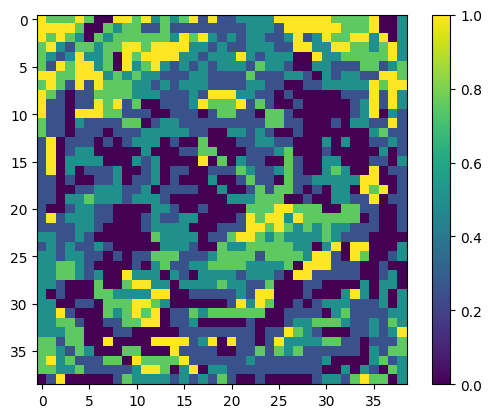

(39, 39, 1198935)

In [12]:
'''Show an image'''
img_idx = 606175
plt.imshow(image_data[:,:,img_idx])
plt.colorbar()
plt.show()
image_data.shape

In [13]:
'''
Create Image Data

Here we can simply (re)create the image data from the saved index file, no need to re-run the IGTD algo
for submitting live predictions.

Again save data for later convenience. Training images can be saved and used later on.

'''
def convert_data_to_image(data):
    index_file = pd.read_csv(f"{result_dir}{error}/_index.txt", sep = "\t")
    i1 = data[:,index_file.iloc[-1].to_numpy()].reshape((data.shape[0],num_row, num_col))
#     max_v = np.max(i1)
#     min_v = np.min(i1)
#     i1 = 255 - (i1 - min_v) / (max_v - min_v) * 255 # So that black means high value
    return np.expand_dims(i1, -1)

image_data = convert_data_to_image(min_max_transform(data[feature_cols].values))
np.save('image_data',image_data)

In [14]:
'''
start here if we've already saved the data to disk
'''

image_data = np.load('image_data.npy')
eras = np.load('eras.npy')
# val_eras = np.load('validation_eras.npy', mmap_mode='r+')
targets = data['target'].values#np.load('targets.npy')

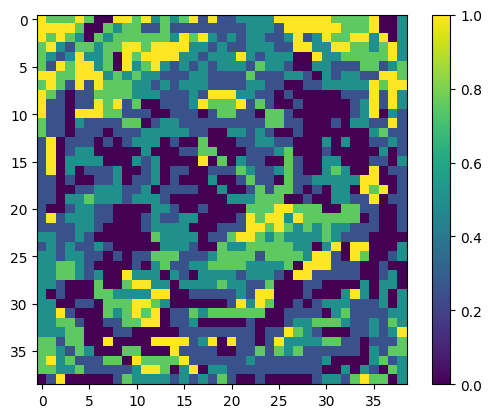

In [15]:
'''
Show an image
Check it is the same as before
'''
plt.imshow(image_data[img_idx,:,:,0])
plt.colorbar()
plt.show()

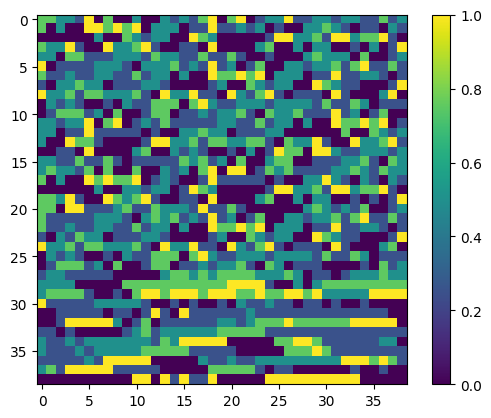

In [16]:
'''
Show a Naive Embedding
'''
plt.imshow(data[feature_cols].iloc[img_idx].to_numpy().reshape((num_row, num_col)))
plt.colorbar()
plt.show()

In [17]:
'''
Convolutional Filter in Numpy
https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
'''

def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

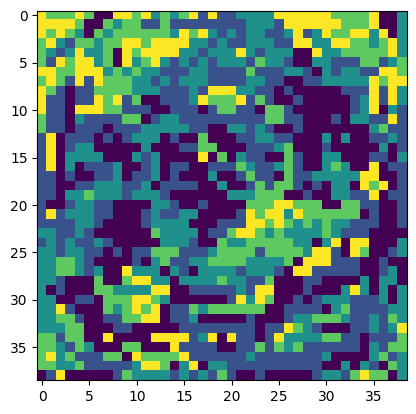

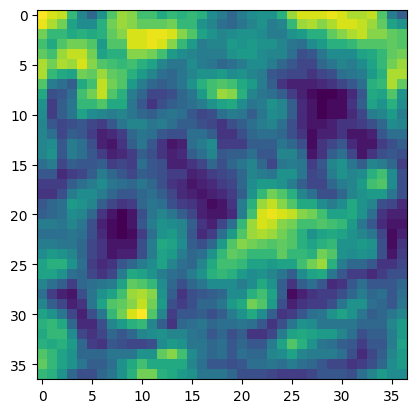

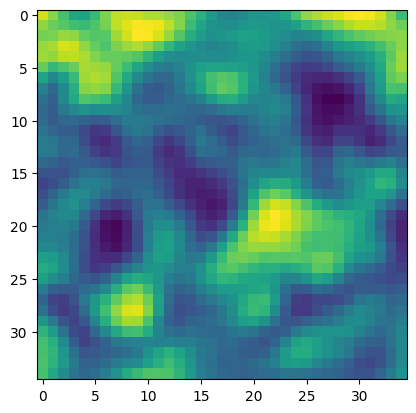

In [18]:
'''
Example of what the convolutional filter does to the image
Run it twice to get an idea of this average smoothing
Experiment with other (random) filters, or edge-finders, for example.

'''

img = image_data[img_idx,:,:,0]
kernel = np.ones((3,3))#np.random.randn(3,3)
output = convolve2D( img, kernel )
output2 = convolve2D( output, kernel )

plt.imshow(img)
plt.show()
plt.imshow(output)
plt.show()
plt.imshow(output2)
plt.show()

In [ ]:
'''
Run all images through convolutional filter
'''

outputs = np.empty((image_data.shape[0], num_row-kernel.shape[0]+1, num_col-kernel.shape[1]+1))
for i in range( image_data.shape[0] ):
    if i%100 == 0:
        print(i, end='\r')
    img = image_data[i,:,:,0]
    outputs[i] = convolve2D( img, kernel )

np.save('outputs', outputs)

In [ ]:
'''
Create Baseline Data and Train Baseline Model, show baseline correlation performance on hold-out set
'''
max_train_era = 850

train_eras = np.where( eras <= max_train_era )
test_eras = np.where( eras > max_train_era )

X_train = data[feature_cols].values[train_eras]
X_test = data[feature_cols].values[test_eras]

Y_train = targets[train_eras]
Y_test = targets[test_eras]

base_model = LGBMRegressor(**{
    "n_estimators": 2000,
    "learning_rate": 0.01,
    "max_depth": 5,
    "num_leaves": 2 ** 5,
    "colsample_bytree": .1,
    "verbose":-1
})
base_model.fit(X_train, Y_train)

preds = base_model.predict(X_test)


In [26]:
print( np.corrcoef(np.vstack([preds, Y_test])) )

[[1.         0.03313168]
 [0.03313168 1.        ]]


In [ ]:
'''
Create data set using "blurred" images, ie  images proceessed with convolutional filter
'''

X_train_blur = outputs[train_eras].reshape((outputs[train_eras].shape[0], outputs.shape[1]*outputs.shape[2]))
X_test_blur = outputs[test_eras].reshape((outputs[test_eras].shape[0], outputs.shape[1]*outputs.shape[2]))

blur_model = LGBMRegressor(**{
    "n_estimators": 2000,
    "learning_rate": 0.01,
    "max_depth": 5,
    "num_leaves": 2 ** 5,
    "colsample_bytree": .1,
    "verbose":-1
})
blur_model.fit(X_train_blur, Y_train)

preds_blur = blur_model.predict(X_test_blur)


In [27]:
print( np.corrcoef(np.vstack([preds_blur, Y_test])) )

[[1.         0.02558699]
 [0.02558699 1.        ]]


In [28]:
'''
Show correlation new Blurred Predictions w/ baseline
'''
np.corrcoef(np.vstack([preds_blur, preds]))

array([[1.        , 0.75029643],
       [0.75029643, 1.        ]])

In [ ]:
'''
Combine baseline features with new blurred features and check correlation
'''
combined_model = LGBMRegressor(**{
    "n_estimators": 2000,
    "learning_rate": 0.01,
    "max_depth": 5,
    "num_leaves": 2 ** 5,
    "colsample_bytree": .1,
    "verbose":-1
})
combined_model.fit(np.hstack([X_train, X_train_blur]), Y_train)

preds_combined = combined_model.predict(np.hstack([X_test, X_test_blur]))

In [29]:
np.corrcoef(np.vstack([preds_combined, Y_test]))

array([[1.        , 0.02806159],
       [0.02806159, 1.        ]])

In [30]:
'''
Show correlation combined Predictions w/ baseline
'''
np.corrcoef(np.vstack([preds_combined, preds]))

array([[1.        , 0.86898508],
       [0.86898508, 1.        ]])

In [ ]:
'''
Check Correlation Sharpe Among Predictions
'''
data.loc[ data['era'].isin(test_eras) ].groupby('era').corr()

In [54]:
data['baseline_preds'] = np.nan
data.iloc[ test_eras[0], data.columns.get_loc('baseline_preds') ] = preds

In [55]:
data['blurred_preds'] = np.nan
data.iloc[ test_eras[0], data.columns.get_loc('blurred_preds') ] = preds_blur

In [56]:
data['combined_preds'] = np.nan
data.iloc[ test_eras[0], data.columns.get_loc('combined_preds') ] = preds_combined

In [71]:
def get_corr_sharpe(pred_col):
    corrs = data.iloc[ test_eras[0] ].groupby('era')[pred_col,'target'].corr().groupby('era').first()['target']
    return corrs.mean()/corrs.std()
get_corr_sharpe('baseline_preds'),get_corr_sharpe('blurred_preds'),get_corr_sharpe('combined_preds')

/tmp/ipykernel_11972/2386064754.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corrs = data.iloc[ test_eras[0] ].groupby('era')[pred_col,'target'].corr().groupby('era').first()['target']
/tmp/ipykernel_11972/2386064754.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corrs = data.iloc[ test_eras[0] ].groupby('era')[pred_col,'target'].corr().groupby('era').first()['target']
/tmp/ipykernel_11972/2386064754.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corrs = data.iloc[ test_eras[0] ].groupby('era')[pred_col,'target'].corr().groupby('era').first()['target']


(0.8823826546572586, 0.8698528831904351, 0.8520198747343636)

In [ ]:
'''
See the Naive Embedding Does for Comparison (TODO)
'''



In [111]:
'''
Code to Submit Live Data
'''
napi.download_dataset("v4.1/live.parquet", "live.parquet")
live_data = pd.read_parquet("live.parquet")

live_image_data = convert_data_to_image(min_max_transform(live_data[feature_cols].values))
l_outputs = np.empty((live_image_data.shape[0], num_row-kernel.shape[0]+1, num_col-kernel.shape[1]+1))
for i in range( live_image_data.shape[0] ):
    if i%100 == 0:
        print(i, end='\r')
    img = live_image_data[i,:,:,0]
    l_outputs[i] = convolve2D( img, kernel )
    
X_live_blur = l_outputs.reshape((l_outputs.shape[0], l_outputs.shape[1]*l_outputs.shape[2]))

live_data["prediction"] = blur_model.predict(X_live_blur)





2022-12-31 16:35:59,675 INFO numerapi.utils: target file already exists
2022-12-31 16:35:59,675 INFO numerapi.utils: starting download
live.parquet: 7.91MB [00:00, 11.2MB/s]                                                                                                   


In [101]:
'''Below is exploratory code for using a Resnet, not working, for the future.'''


NameError: name 'ni' is not defined

In [10]:
# import tensorflow as tf
# print( tf.__version__ )
# print( tf.config.list_physical_devices() )


In [30]:
max_train_era = 500

train_eras = np.where( eras <= max_train_era )
test_eras = np.where( eras > max_train_era )

X_train = image_data[train_eras,:,:,:][0]
X_test = image_data[test_eras,:,:,:][0]

X_train = X_train * 2 - 1
X_test = X_test * 2 - 1


Y_train = targets[train_eras] * 4
# Y_train = np.digitize(Y_train, bins = [-0.1, 0.05, 0.35, 0.65, 0.95, 1.1])
Y_train = to_categorical(Y_train, 5)

# X_train = X_train[ Y_train != 2, :, :, : ]
# Y_train = Y_train[ Y_train != 2 ]

Y_test = targets[test_eras] * 4
# Y_test = np.digitize(Y_test, bins = [-0.1, 0.05, 0.35, 0.65, 0.95, 1.1])
Y_test = to_categorical(Y_test, 5)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 16, 16, 1)]  0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 16, 16, 3)    0           ['input_1[0][0]',                
                                                                  'input_1[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 22, 22, 3)    0           ['concatenate[0][0]']            
                                                                                              

 ormalization)                                                                                    
                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 4, 4, 256)   0           ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 4, 4, 64)     16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 4, 4, 64)    256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 2, 2, 128)    147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 2, 2, 128)   0           ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 2, 2, 512)    66048       ['conv3_block2_2_relu[0][0]']    
          

                                                                                                  
 conv4_block1_1_conv (Conv2D)   (None, 1, 1, 256)    131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 1, 1, 256)   1024        ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 1, 1, 256)   0           ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block3_2_relu (Activatio  (None, 1, 1, 256)   0           ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 1, 1, 1024)   263168      ['conv4_block3_2_relu[0][0]']    
                                                                                                  
 conv4_block3_out (Add)         (None, 1, 1, 1024)   0           ['conv4_block2_out[0][0]',       
                                                                  'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_block4_preact_bn (BatchN  (None, 1, 1, 1024)  4096        ['conv4_block3_out[0][0]']       
 ormalization)                                                                                    
          

 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 3, 3, 256)   0           ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 1, 1, 256)    589824      ['conv4_block6_2_pad[0][0]']     
                                                                                                  
 conv4_block6_2_bn (BatchNormal  (None, 1, 1, 256)   1024        ['conv4_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 1, 1, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 1, 1, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 1, 1, 512)    1048576     ['conv5_block3_preact_relu[0][0]'
                                                                 ]                                
          

/home/jefferythewind/anaconda3/envs/ml/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 6s 153ms/step


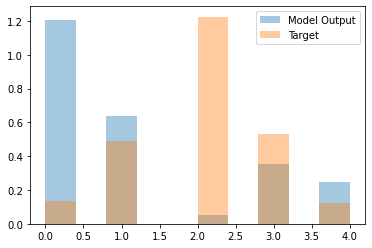

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.layers import LeakyReLU, Concatenate, Input, Flatten, GlobalAveragePooling2D, Dropout

'''Define a cool Convnet'''
img_input = Input(shape=(num_row, num_col, 1))

img_conc = Concatenate()([img_input, img_input, img_input])
# x = layers.Conv2D(4, (num_row, num_col), activation='relu')(img_conc)
# x = layers.Conv2D(4, (num_row, 1), activation='relu')(x)

resnet_model = tf.keras.applications.ResNet50V2(
    weights='imagenet', 
    include_top=False, 
    input_tensor=img_conc,
    pooling=None
#     classifier_activation='softmax'
)

# add new classifier layers
# x = Dropout(0.5)(x)
flat1 = Flatten()(resnet_model.output)
# flat1 = Dropout(0.5)(flat1)
# flat1 = layers.Dense(1024, activation='relu')(flat1)
# output = coral.CoralOrdinal(num_classes = 5)(flat1)#
output = layers.Dense(5, activation='softmax')(flat1)
# define new model
model = tf.keras.Model(inputs=resnet_model.inputs, outputs=output)
print( model.summary() )


# Instantiate a loss function.
# loss_fn = coral.OrdinalCrossEntropy(
#     importance_weights=[.000001, .5, .5 ,.000001]
# )
loss_fn = losses.CategoricalCrossentropy()
optimizer = optimizers.Adam(lr=0.0001)
model.compile(
    optimizer = optimizer, 
    loss = loss_fn, 
    metrics=['accuracy']
)


pred = model.predict(X_train[:1000])
# pred = coral.ordinal_softmax(model.predict(X_train[:1000]))
plt.hist( np.argmax( pred, axis=1), alpha=0.4, density=True, label='Model Output' )
plt.hist( np.argmax(Y_train[:1000], axis=1), alpha=0.4, density=True, label='Target' )
# plt.hist( Y_train[:1000], alpha=0.4, density=True, label='Target' )
plt.legend()
plt.show()

In [32]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='BestResnet41',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

model.fit(
    X_train, Y_train,
    epochs=10000,
    batch_size=32, 
    validation_data=(X_test, Y_test),
    class_weight={0:1,1:1,2:1,3:1,4:1},
    steps_per_epoch=64,
    validation_steps=64,
    shuffle=True,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/10000
64/64 [==============================] - 60s 904ms/step - loss: 1.6240 - accuracy: 0.3125 - val_loss: 1.4557 - val_accuracy: 0.4531
Epoch 2/10000
64/64 [==============================] - 60s 945ms/step - loss: 1.4783 - accuracy: 0.4106 - val_loss: 1.4256 - val_accuracy: 0.4360
Epoch 3/10000
64/64 [==============================] - 59s 930ms/step - loss: 1.4056 - accuracy: 0.4736 - val_loss: 1.4716 - val_accuracy: 0.3960
Epoch 4/10000
59/64 [==========================>...] - ETA: 3s - loss: 1.4312 - accuracy: 0.4635

KeyboardInterrupt: 

In [7]:
# Prepare the training dataset.
batch_size = 512
num_environments = 4

epochs = 5000
min_loss = 1000000
max_corr = 0
losses = {
    'in_sample':[],
    'out_of_sample':[],
    'ood_corr':[]
}

for epoch in range(epochs):
    
    # Iterate over the batches of the dataset.
    step = 0
    batch_loss_value = None
    batches = 64#len(X_train) / batch_size
    epoch_masks = []
    while step < batches:
        rdn_idx = np.random.randint(0, len(X_train)-batch_size,1)[0]
        x_batch_train = X_train[rdn_idx:rdn_idx+batch_size]
        y_batch_train = Y_train[rdn_idx:rdn_idx+batch_size]

        with tf.GradientTape(persistent=True) as tape:
            logits = model(x_batch_train, training=True)  # Logits for this minibatch
            loss_value = loss_fn(y_batch_train, logits)
            if batch_loss_value is None:
                batch_loss_value = loss_value
            else:
                batch_loss_value += loss_value
        
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        #
        #next 2 chunks for the and-mask
        #
#         for j, grad in enumerate( grads ):
#             mask = tf.where(grad > 0, 1,-1)
#             if len( epoch_masks ) <= j:
#                 epoch_masks.append( [[]] * num_environments )
                
#             epoch_masks[j][ step % num_environments ] = mask
            
#         
        
#     grads = tape.gradient(batch_loss_value, model.trainable_weights)
#     for j, grad in enumerate( grads ):
#         grads[j] = grad * tf.cast( tf.where( tf.abs( tf.add_n( epoch_masks[j] ) ) >= int( len( epoch_masks[j] ) * .9 ), 1, 0 ), tf.float32 )
#     optimizer.apply_gradients(zip(grads, model.trainable_weights))
        step += 1
    
    if epoch % 5 == 0:
        step = 0
        loss_value = None
        while step < batches:
            rdn_idx = np.random.randint(0, len(X_test)-batch_size,1)[0]
            x_batch_test = X_test[rdn_idx:rdn_idx+batch_size]
            y_batch_test = Y_test[rdn_idx:rdn_idx+batch_size]

            with tf.GradientTape() as tape:
                logits = model(x_batch_test, training=False)  # Logits for this minibatch

                if loss_value is None:
                    loss_value = loss_fn(y_batch_test, logits)
                else:
                    loss_value += loss_fn(y_batch_test, logits)
                step += 1

    
        output = model.predict(X_test)
        
#         ood_corr = np.corrcoef( [ np.argmax( coral.ordinal_softmax(output), axis=1), Y_test ] )[0,1]
        ood_corr = np.corrcoef( [ np.argmax( output, axis=1), np.argmax( Y_test, axis=1) ] )[0,1]
        
        losses['ood_corr'].append( ood_corr )
        losses['in_sample'].append( float(batch_loss_value)/step)
        losses['out_of_sample'].append( float(loss_value)/step)

        if losses['out_of_sample'][-1] < min_loss:
            model.save_weights('IGTD_Resnet')
            max_corr = ood_corr
    
        print("Epoch %d, Train Loss: %s, Test Loss: %s, Test Corr: %s" % (epoch,losses['in_sample'][-1],losses['out_of_sample'][-1], ood_corr), end='\r')
    print('epoch %s' % epoch, end='\r')
    
        

 392/7155 [>.............................] - ETA: 44s 

KeyboardInterrupt: 

32/32 [==============================] - 1s 41ms/step


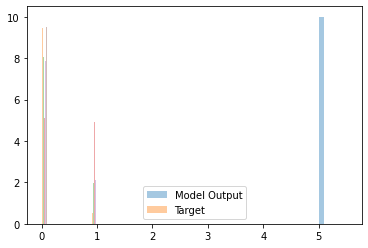

In [10]:
pred = coral.ordinal_softmax(model.predict(X_train[:1000]))
plt.hist( np.argmax( pred, axis=1), alpha=0.4, density=True, label='Model Output' )
plt.hist( Y_train[:1000], alpha=0.4, density=True, label='Target' )
plt.legend()
plt.show()

32/32 [==============================] - 1s 42ms/step


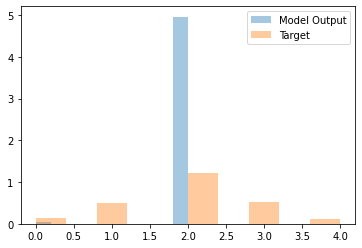

In [9]:
pred = model.predict(X_train[:1000])
plt.hist( np.argmax( pred, axis=1), alpha=0.4, density=True, label='Model Output' )
plt.hist( np.argmax( Y_train[:1000],axis=1), alpha=0.4, density=True, label='Target' )
plt.legend()
plt.show()

In [8]:
#model.save_weights('IGTD_Resnet')
model.load_weights('BestResnet2')
# model.load_weights('Converged_CrossEntropy_Resnet50')
plt.plot(losses['in_sample'], label='in sample')
plt.plot(losses['out_of_sample'], label='out of sample')
plt.legend()
plt.title("IGTD Resnent 50 - Learning Curves")
plt.show()

TypeError: 'module' object is not subscriptable

7155/7155 [==============================] - 46s 6ms/step


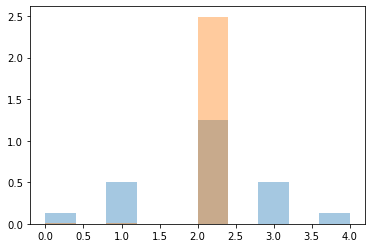

array([[1.        , 0.01017262],
       [0.01017262, 1.        ]])

In [9]:
output = model.predict(X_test)
plt.hist( np.argmax( Y_test, axis=-1 ) , alpha=0.4, density=True )
plt.hist( np.argmax( output, axis=-1 ), alpha=0.4, density=True )
plt.show()
np.corrcoef( [ np.argmax( output, axis=-1 ), np.argmax( Y_test, axis=1 ) ] )

In [10]:
np.corrcoef( [ np.argmax( output, axis=1 ), np.argmax( Y_test, axis=-1 ) ] )

array([[1.        , 0.01358921],
       [0.01358921, 1.        ]])

In [18]:
val_df = pd.read_parquet('validation.parquet')
val_df = val_df[ val_df['data_type'] == 'validation' ]


In [19]:
#val_eras = np.load('validation_eras.npy', mmap_mode='r+')
val_data = image_data[np.where( np.isin(eras, val_eras) ),:,:,:][0]

In [23]:
val_df.shape, val_data.shape

((2240650, 1214), (2208985, 34, 34, 1))

In [20]:
output = np.empty((val_data.shape[0],1))

In [21]:
chunksize = 100000
i=0
while i*chunksize < val_data.shape[0]:
    output[i*chunksize:(i+1)*chunksize] = np.expand_dims( 
        np.argmax( 
            model.predict(
                val_data[i*chunksize:(i+1)*chunksize]
            ), 
            axis=1
        ),
        -1
    )
    print(i*chunksize/val_data.shape[0], end='\r')
    i += 1

 603/3125 [====>.........................] - ETA: 1:46

KeyboardInterrupt: 

In [ ]:
val_df['prediction'] = output

In [ ]:
import numerapi
val_df["prediction"] = val_df['prediction'].rank(pct=True)
val_df["prediction"].to_csv("igtd_val.csv", index=True)


example_public_id = "XXX"
example_secret_key = "XXX"
napi = numerapi.NumerAPI(example_public_id, example_secret_key)

# upload predictions
napi.upload_diagnostics("igtd_val.csv", model_id="XXX")



In [27]:
model.save_weights('Production_CrossEntropy_Resnet50')